In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

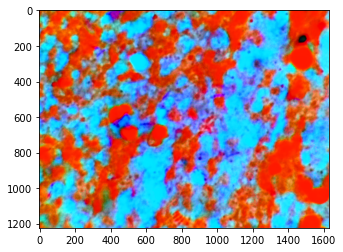

In [5]:
# Reading the image
img = cv2.imread('data/tuberculosis-phone-0235.jpg')
df=pd.read_csv("data/tuberculosis-phone-0235.csv")


imga = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

#img=cv2.medianBlur(img,3)
imga[:,:,0]=cv2.equalizeHist(imga[:,:,0])
imga[:,:,1]=cv2.equalizeHist(imga[:,:,1])
imga[:,:,2]=cv2.equalizeHist(imga[:,:,2])
#img[:,:,2]=cv2.equalizeHist(img[:,:,0])
hist_eq = cv2.cvtColor(imga, cv2.COLOR_YUV2BGR)

plt.imshow(hist_eq)
plt.show()

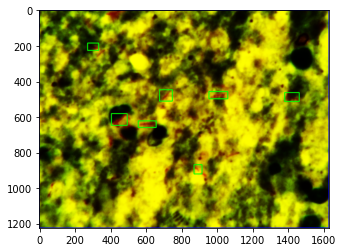

In [208]:
# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower bound and upper bound for Green color
lower_bound = np.array([0, 0, 0])   
upper_bound = np.array([255, 355, 255])
# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)


#define kernel size  
kernel = np.ones((7,7),np.uint8)
# Remove unnecessary noise from mask
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)

# Find contours from the mask
contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)

rgbimg = cv2.cvtColor(output, cv2.COLOR_HSV2BGR)

for coordinate in df.iterrows():
    cv2.rectangle(output, (int(coordinate[1][0].split(" ")[0]), int(coordinate[1][0].split(" ")[1])), (int(coordinate[1][0].split(" ")[2]), int(coordinate[1][0].split(" ")[3])), (0, 255, 0), 3, cv2.LINE_AA)
    
    
plt.imshow(output)
plt.show()

In [57]:
rgbimg = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

Let's try analyzing positive and negative samples

In [3]:
X_new=np.load("variables/X_new_eq_2.npy")
y_new=np.load("variables/y_new_eq_2.npy")

In [4]:
print(X_new.shape,y_new.shape)

(38416, 224, 224, 3) (38416,)


In [6]:
index_1=np.where(y_new==1)
index_0=np.where(y_new==0)
alindex=np.random.randint(0,500,20)

In [7]:
X_0=X_new[index_0]
X_1=X_new[index_1]

In [14]:
hist_0,bins=np.histogram(X_1[10,:,:,0],250,[0,256])